# Solving the pendulum equation numerically

feat. SymPy and SciPy (eventually)

based on https://www.youtube.com/watch?v=p_di4Zn4wz4&list=PLZHQObOWTQDNPOjrT6KVlfJuKtYTftqH6&index=1

## Writing 

In [37]:
# TODO: Use SciPy to do ODE calc

from sympy import symbols, Function, lambdify, Eq, sin, solve, srepr, diff, dsolve
from sympy.utilities.lambdify import lambdastr
from sympy.abc import t, mu, g, L, omega, theta
from math import pi
import numpy as np

In [38]:
# equation to model \ddot theta(t) = -\mu\dot\theta(t) - \frac{g}{L}\sin(\theta(t))
theta_f = Function('theta')
theta_dot = theta_f(t).diff(t)
theta_ddot = theta_dot.diff(t)
pendulumn = Eq(theta_ddot, -mu * theta_dot  - (g / L)  * sin(theta_f(t)))
pendulumn

Eq(Derivative(theta(t), (t, 2)), -mu*Derivative(theta(t), t) - g*sin(theta(t))/L)

In [39]:
theta_ddot_sol = solve(pendulumn, theta_ddot)[0]
comp_sol = theta_ddot_sol.replace(theta_dot, omega).replace(theta_f(t), theta)
comp_sol

-mu*omega - g*sin(theta)/L

In [40]:
theta_ddot_f = lambdify((theta, omega, mu, g, L), comp_sol)

In [41]:
GRAVITY = 9.81
MU = 0.3
ELL = 4
DELTA = 0.01
def theta(t, theta=np.pi/3, theta_dot=0, delta=DELTA, mu=MU, L=ELL):
	thetas = [theta]
	theta_dots = [theta_dot]
	for time in np.arange(0, t, delta):
		tdd = theta_ddot_f(theta, theta_dot, mu, GRAVITY, 4)
		theta += theta_dot * delta
		theta_dot += tdd * delta
		thetas.append(theta)
		theta_dots.append(theta_dot)
	return (theta, thetas, theta_dots)


In [42]:
theta(10)[0]

-0.21613276033756987

## Graphing Phase Space

In [43]:
# theta, theta_dot
X, Y = np.meshgrid(
	np.linspace(-np.pi / 2, np.pi / 2, 75),
	np.linspace(-1.5, 1.5, 75),
)
U = Y
# theta_ddot
V = theta_ddot_f(X, Y, 0.3, GRAVITY, 4)
# Magnitude
M = np.hypot(U, V)

In [44]:
import matplotlib.pyplot as plt

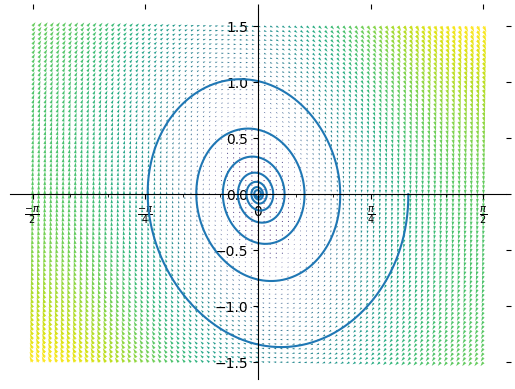

In [45]:
# %matplotlib tk
ax = plt.subplot()
# Lots of plot formatting

# https://stackoverflow.com/a/31558968
# https://stackoverflow.com/a/34711742
# Move left y-axis and bottom x-axis to (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show ticks in the left and lower axes only
ax.xaxis.set_tick_params(bottom='on', top='off')
ax.yaxis.set_tick_params(left='on', right='off')

# Multiples of pi for theta
# https://stackoverflow.com/a/53586826
def multiple_formatter(denominator=4, number=np.pi, latex='\pi'):
    def gcd(a, b):
        while b:
            a, b = b, a%b
        return a
    def _multiple_formatter(x, pos):
        den = denominator
        num = int(np.rint(den*x/number))
        com = gcd(num,den)
        (num,den) = (int(num/com),int(den/com))
        if den==1:
            if num==0:
                return r'$0$'
            if num==1:
                return r'$%s$'%latex
            elif num==-1:
                return r'$-%s$'%latex
            else:
                return r'$%s%s$'%(num,latex)
        else:
            if num==1:
                return r'$\frac{%s}{%s}$'%(latex,den)
            elif num==-1:
                return r'$\frac{-%s}{%s}$'%(latex,den)
            else:
                return r'$\frac{%s%s}{%s}$'%(num,latex,den)
    return _multiple_formatter

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 4))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

# Draw phase space velocity arrows
ax.quiver(X, Y, U, V, M)
# Draw path through phase space
T = 30
_, thetas, theta_dots = theta(T)
ax.plot(thetas[:-1], theta_dots[:-1])